In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import joblib

In [7]:
df=pd.read_csv('green_tech_data.csv')
df.head(30)

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0
5,104.598082,324.363006,0.009197,4.891334,0
6,70.329264,469.344631,0.101472,2.823352,0
7,353.161651,779.996025,0.663502,1.953304,0
8,260.390254,305.918349,0.005062,4.078338,0
9,297.825402,169.281919,0.160808,1.718745,0


In [8]:
df.shape

(100, 5)

In [3]:
X=df[['carbon_emissions','energy_output','renewability_index','cost_efficiency']]
y=df[['sustainability']]

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [11]:
model1=LogisticRegression()
model1.fit(X_train,y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [12]:
y_pred=model1.predict(X_test)

In [13]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [14]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the model",accuracy)

Accuracy of the model 0.95


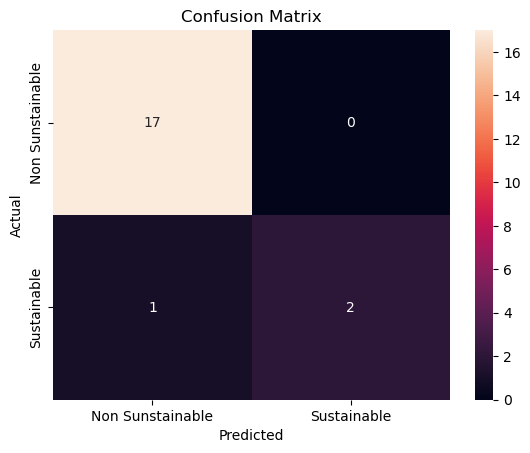

In [17]:
import seaborn as sns
Conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(Conf_matrix,annot=True,fmt='d',color='blue',xticklabels=['Non Sunstainable','Sustainable'],yticklabels=['Non Sunstainable','Sustainable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
print(classification_report(y_test,y_pred,target_names=['Non Sunstainable','Sustainable']))

                  precision    recall  f1-score   support

Non Sunstainable       0.94      1.00      0.97        17
     Sustainable       1.00      0.67      0.80         3

        accuracy                           0.95        20
       macro avg       0.97      0.83      0.89        20
    weighted avg       0.95      0.95      0.95        20



In [20]:
joblib.dump(model1,'logregmodel_sustainable.pk1')

['logregmodel_sustainable.pk1']